addprocs() = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
 11.681410 seconds (11.00 M allocations: 478.304 MiB, 0.63% gc time, 2.52% compilation time)
 12.501894 seconds (9.92 M allocations: 420.283 MiB, 0.44% gc time, 0.59% compilation time)
(mean(pi1), std(pi1)) = (3.1415738660000003, 0.00162932335461792)
(mean(pi2), std(pi2)) = (3.1416157528, 0.0009756477760700611)


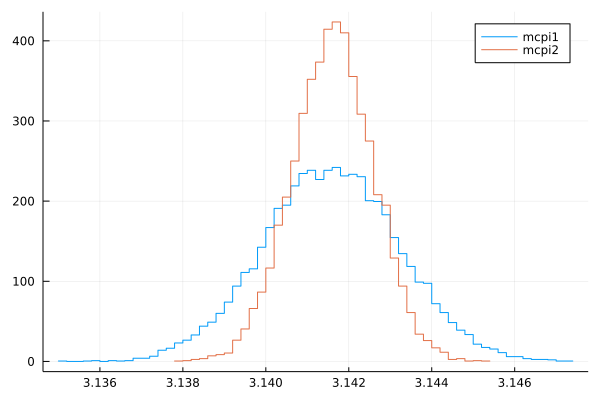

In [1]:
using Statistics
using Plots
using Distributed

rmprocs(procs()[2:end])
@show addprocs()

function mcpi1(n)
    c = @distributed (+) for _ in 1:n
        rand()^2 + rand()^2 ≤ 1
    end
    4c/n
end

function mcpi2(n)
    c = @distributed (+) for _ in 1:n
        x, y = rand(), rand()
        if x + y < 1
            x, y = 1 - y, 1 - x
        end
        x^2 + y^2 ≤ 1
    end
    2c/n + 2
end

@time pi1 = [mcpi1(10^6) for _ in 1:10^4]
@time pi2 = [mcpi2(10^6) for _ in 1:10^4];

@show mean(pi1), std(pi1)
@show mean(pi2), std(pi2)

stephist(pi1; norm=true, label="mcpi1")
stephist!(pi2; norm=true, label="mcpi2")